In [1]:
#importing the libraries
import os
import gdown
import ydata_profiling #provide a one-line Exploratory Data Analysis (EDA)
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from colorama import Fore, Back, Style
%matplotlib inline

In [2]:
# URL to the dataset file on Google Drive
url = 'https://drive.google.com/uc?id=1T-luG382E1sJJFO4RG6k4TdRmtDmzh5q'

# Directory where you want to save the dataset
data_dir = 'data'

# Create the directory if it doesn't exist
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

# Path to save the dataset
file_path = os.path.join(data_dir, 'online_retail.csv')

# Download the dataset file
gdown.download(url, file_path, quiet=False)

print("Dataset downloaded and saved successfully.")

Downloading...
From: https://drive.google.com/uc?id=1T-luG382E1sJJFO4RG6k4TdRmtDmzh5q
To: /Users/abdelrahmannasser/Documents/ML-Master-Class/third-week/Unsupervised_Task/data/online_retail.csv
100%|██████████████████████████████████████| 44.5M/44.5M [00:16<00:00, 2.63MB/s]


Dataset downloaded and saved successfully.


In [3]:
# Importing the dataset
df=pd.read_csv("data/online_retail.csv")

# Checking the head of the data
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom

In [4]:
# Checking the info and if there is any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


<Axes: >

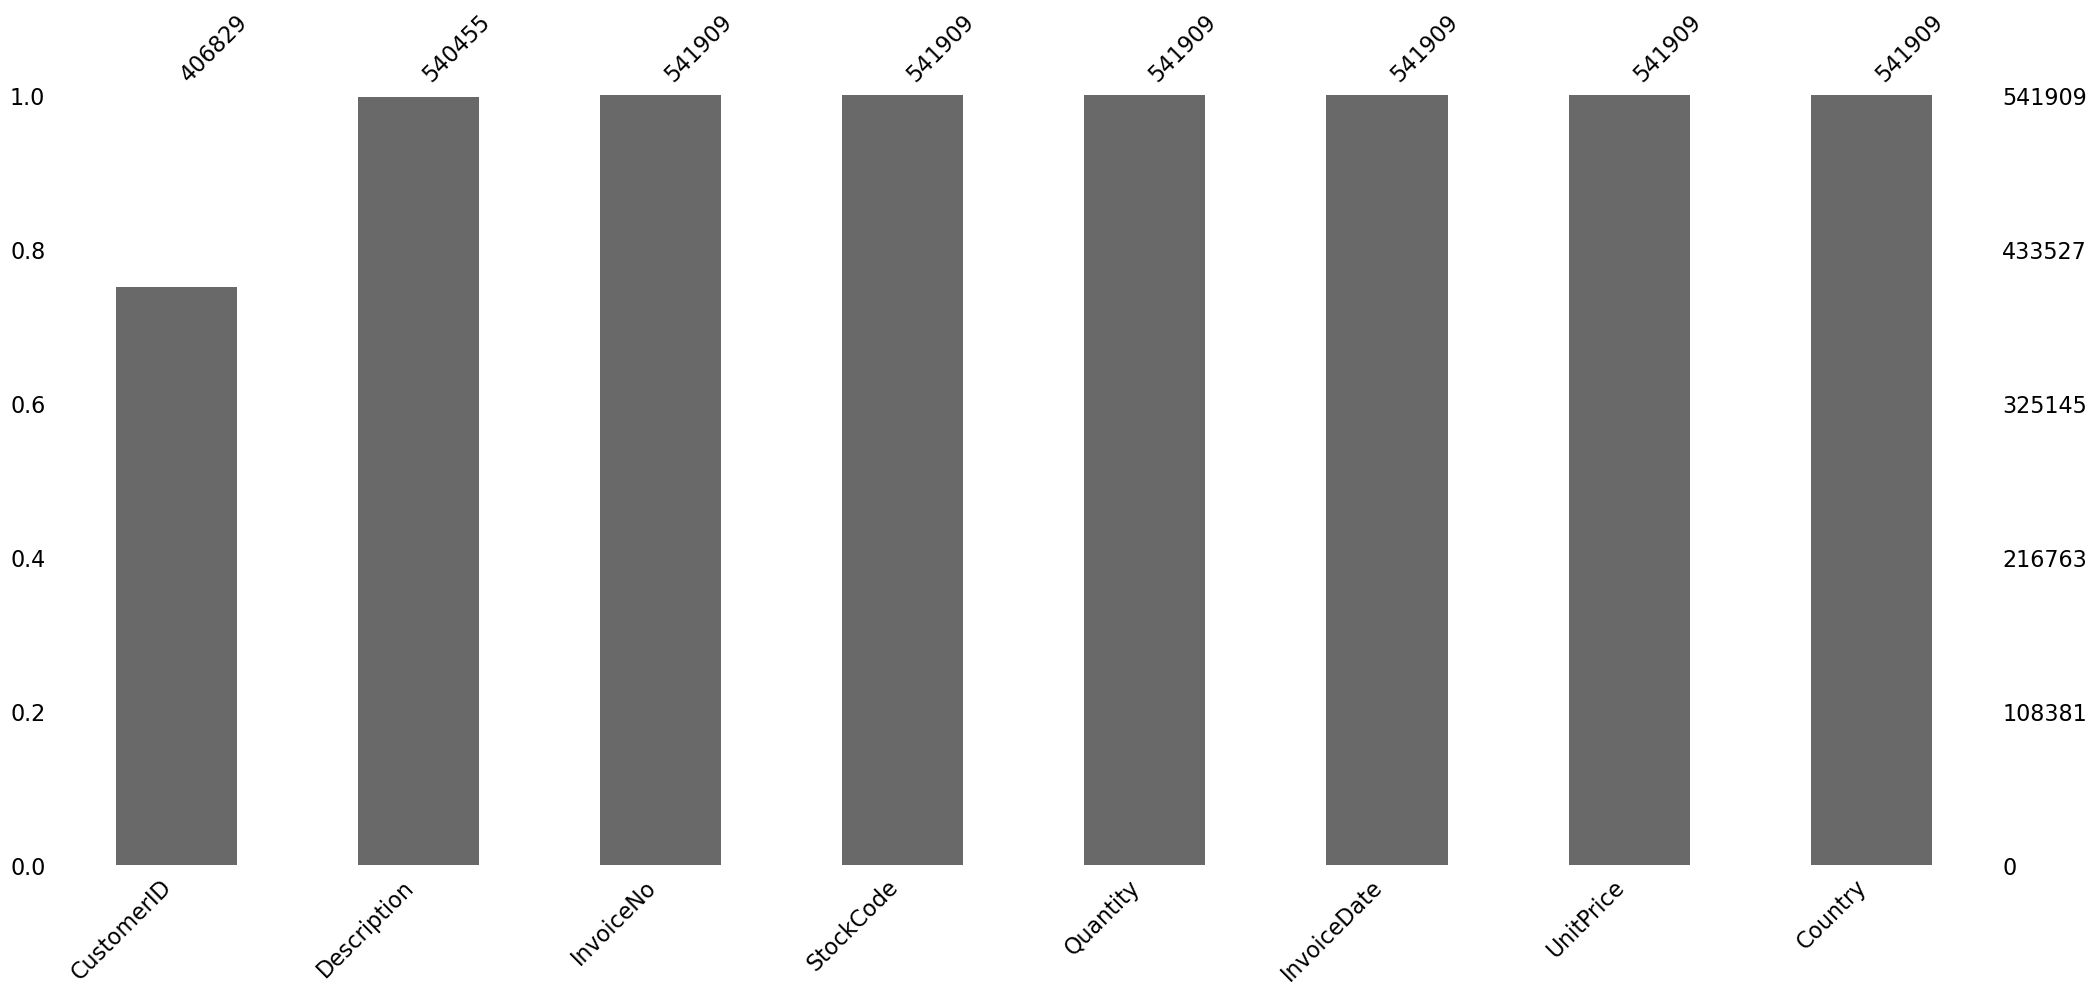

In [5]:
# Visualizing missing data in datasets : generating a bar chart where 
# the columns with the least missing values will be on the left, 
# and those with the most missing values will be on the right

msno.bar(df, sort='ascending')

In [6]:
# Generate a detailed report on the DataFrame 'df' using the pandas_profiling library
# This report includes statistics, summaries, and visualizations to understand the dataset
ydata_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# Check DataFrame Shape:
#   - This step compares the shape of the DataFrame before and after dropping missing values.
#   - The shape of the DataFrame represents the number of rows and columns.
#   - By comparing shapes, we can verify if rows with missing values have been successfully removed.

print(f"Before dropping missing values: {Style.BRIGHT}{df.shape}{Style.RESET_ALL}")
# Drops rows from the DataFrame where either the 'CustomerID' or 'Description' column has missing (NaN) values.
df.dropna(subset=['CustomerID', 'Description'], inplace=True)
print(f"After dropping missing values: {Style.BRIGHT}{df.shape}{Style.RESET_ALL}")

Before dropping missing values: (541909, 8)
After dropping missing values: (406829, 8)


In [8]:
# Check for Missing Values Again:
#   - This step calculates the number of missing values per column in the DataFrame after dropping.
#   - The `.isnull().sum()` method is used to count missing values for each column.
#   - By inspecting the missing values count, we can confirm if there are no missing values left after removal.

missing_values_count_per_column = df.isnull().sum()
print("Number of missing values per column after removal:\n")
missing_values_count_per_column

Number of missing values per column after removal:



InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
# Visual Inspection:
#   - This step allows for a visual inspection of the DataFrame after removing missing values.
#   - The `.head()` method is used to display the first few rows of the DataFrame.
#   - By visually inspecting the DataFrame, we can ensure that missing values have been successfully removed.

print("DataFrame after removal of missing values:\n")
df.head()

DataFrame after removal of missing values:



InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom

In [10]:
# Calculate the number of duplicated rows in the DataFrame 'df'.
# The method 'duplicated()' returns a boolean Series indicating whether each row is duplicated or not.
# The method 'sum()' then sums up the boolean values, effectively counting the number of duplicated rows.

print(f"No. of duplicated rows: {Style.BRIGHT}{df.duplicated().sum()}{Style.RESET_ALL}")

No. of duplicated rows: 5225


In [11]:
# Remove duplicated rows from the DataFrame 'df' and modify 'df' in place.
df.drop_duplicates(inplace=True)

# Retrieve the dimensions (number of rows and columns) of the DataFrame 'df'.
df.shape

(401604, 8)

In [12]:
# Check the negative values in Quantity

negative_quantity_count = df['Quantity'] < 0

df[negative_quantity_count].head()

InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

       InvoiceDate  UnitPrice  CustomerID         Country  
141   12/1/10 9:41      27.50     14527.0  United Kingdom  
154   12/1/10 9:49       4.65     15311.0  United Kingdom  
235  12/1/10 10:24       1.65     17548.0  United Kingdom  
236  12/1/10 10:24       0.29     17548.0  United Kingdom  
237  12/1/10 10:24       0.29     17548.0  United Kingdom

In [13]:
df[negative_quantity_count].shape

(8872, 8)

In [14]:
# Negative values represent returned or cancelled items

df[negative_quantity_count]['InvoiceNo'].unique()


array(['C536379', 'C536383', 'C536391', ..., 'C581499', 'C581568',
       'C581569'], dtype=object)

In [15]:
display(df[negative_quantity_count]['InvoiceNo'].head(200).unique())

array(['C536379', 'C536383', 'C536391', 'C536506', 'C536543', 'C536548',
       'C536606', 'C536622', 'C536625', 'C536642', 'C536734', 'C536737',
       'C536757', 'C536758', 'C536760', 'C536807', 'C536812', 'C536814',
       'C536815', 'C536816', 'C536817', 'C536818', 'C536820', 'C536822',
       'C536825', 'C536826', 'C536827', 'C536828', 'C536829', 'C536850',
       'C536853', 'C536854', 'C536855', 'C536978', 'C536979', 'C537024',
       'C537039', 'C537043', 'C537132', 'C537143', 'C537157', 'C537164',
       'C537203', 'C537232', 'C537234', 'C537314', 'C537320', 'C537333',
       'C537373', 'C537379', 'C537383', 'C537398', 'C537402', 'C537406',
       'C537408', 'C537413', 'C537414', 'C537416', 'C537417', 'C537431',
       'C537444', 'C537445', 'C537530', 'C537596', 'C537597', 'C537602',
       'C537611', 'C537656', 'C537677', 'C537684', 'C537746', 'C537756',
       'C537763', 'C537788', 'C537797', 'C537798', 'C537805', 'C537807',
       'C537812', 'C537814', 'C537820', 'C537821', 

In [16]:
df[(df['InvoiceNo'].str[0] != 'C') & negative_quantity_count]['InvoiceNo'].head()

# For all rows where Quantity is less than 0,
#the invoice number starts with "C". 
# It seems these really are "Cancelled" transactions.

Series([], Name: InvoiceNo, dtype: object)

In [17]:
display(df[negative_quantity_count]['StockCode'].head(1000).unique())

array(['D', '35004C', '22556', '21984', '21983', '21980', '21484',
       '22557', '22553', '22960', '22632', '22355', '22244', '22242',
       '20914', '22892', '22654', '22767', '22333', '22245', '22077',
       '22631', '22168', '21218', '20957', '22580', '22752', '22839',
       '21463', '22780', '85048', '22798', '84347', '21314', '22175',
       '22273', '22501', '22778', '22578', '22574', '22593', '22595',
       '22588', '22130', '21527', '72799E', '85066', '21586', '21258',
       '85175', '22178', '21129', '22187', '71477', '84947', '22877',
       '22869', '22878', '21843', '22847', '21430', '22617', '22197',
       '35004B', '22832', '84946', '22942', '22689', '22591', '22186',
       '84678', '22158', '22944', '21871', '22776', '84685', '22630',
       '20893', '22854', '20936', '22575', '11001', '22788', '22184',
       '71279', '22761', '22769', '22762', '20685', '35953', '37449',
       '21424', '84840', '22653', '21349', '35400', '22636', '22423',
       '22865', '2165

In [18]:
# Most Stock Codes are 5 characters in length.
df[(df['StockCode'].str.len() != 5) & (df['Quantity'] < 0)]['StockCode'].count()

1002

In [19]:
code_less_than_5 = df[df['StockCode'].str.len() < 5]['StockCode']
code_more_than_6 = df[df['StockCode'].str.len() > 6]['StockCode']


print(f"Number of transactions with a `StockCode` length less than 5: {Style.BRIGHT}{code_less_than_5.count()}{Style.RESET_ALL}")
print(f"Number of transactions with a `StockCode` length more than 6: {Style.BRIGHT}{code_more_than_6.count()}{Style.RESET_ALL}")

Number of transactions with a `StockCode` length less than 5: 1903
Number of transactions with a `StockCode` length more than 6: 308


In [20]:
# There are a very small number of transactions with a `StockCode` that is not 5 or 6 characters in length.
# Due to the small number these can safely be dropped from the data set.

remove = np.concatenate((code_less_than_5.unique(), code_more_than_6.unique()))
remove = np.unique(remove)

df = df[~df['StockCode'].isin(remove)]

# Getting the number of rows in the dataframe
df.shape[0]

399393

In [22]:
# Check if InvoiceNo starts with 'C'
cancellation_mask = df['InvoiceNo'].astype(str).str.startswith('C')

# Use boolean indexing to set 'Transaction_Status' to 'Cancelled' for rows where InvoiceNo starts with 'C'
df.loc[cancellation_mask, 'Transaction_Status'] = 'Cancelled'

# Use boolean indexing to set 'Transaction_Status' to 'Completed' for rows where InvoiceNo does not start with 'C'
df.loc[~cancellation_mask, 'Transaction_Status'] = 'Completed'

# Analyze the characteristics of these rows (considering the new column)
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancelled_transactions.describe().drop('CustomerID', axis=1)

Quantity    UnitPrice
count   8501.000000  8501.000000
mean     -31.476415     4.439495
std     1197.403070     9.201798
min   -80995.000000     0.030000
25%       -6.000000     1.450000
50%       -2.000000     2.550000
75%       -1.000000     4.950000
max       -1.000000   295.000000

In [23]:
# Investigate the transactions with 0 price

print(f"Number of transactions with a `UnitPrice` 0: {Style.BRIGHT}{df[df['UnitPrice']==0]['CustomerID'].count()}{Style.RESET_ALL}")


Number of transactions with a `UnitPrice` 0: 33


In [24]:
# Removing records with a unit price of zero
df = df[df['UnitPrice'] > 0]

df.shape

(399360, 9)

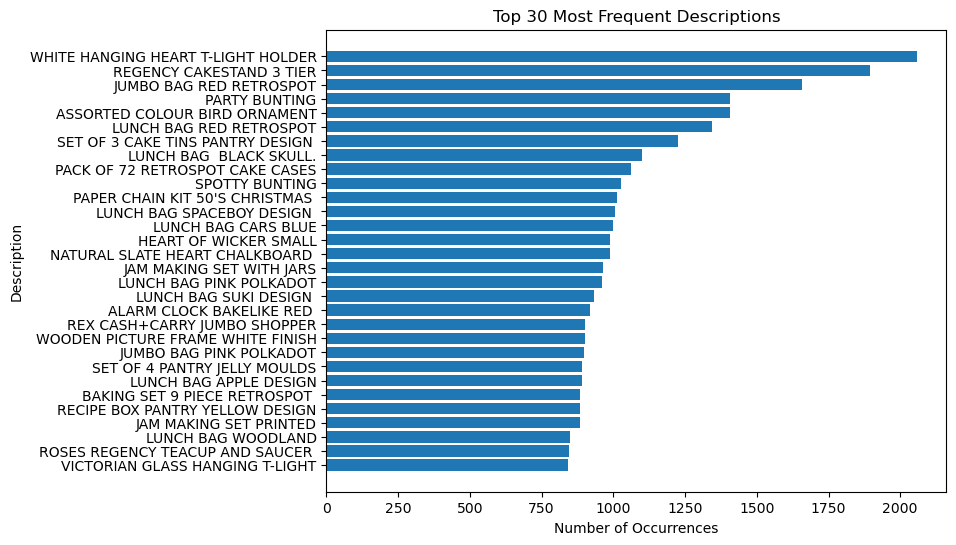

In [25]:
# Standardize the text to uppercase to maintain uniformity across the dataset
df['Description'] = df['Description'].str.upper()

# Calculate the occurrence of each unique description and sort them
description_counts = df['Description'].value_counts()

# Get the top 30 descriptions
top_30_descriptions = description_counts[:30]

# Plotting
plt.figure(figsize=(8,6))
plt.barh(top_30_descriptions.index[::-1], top_30_descriptions.values[::-1])

# Adding labels and title
plt.xlabel('Number of Occurrences')
plt.ylabel('Description')
plt.title('Top 30 Most Frequent Descriptions')

# Show the plot
plt.show()

In [26]:
# Reset the index of the DataFrame 'df':
#   - drop=True specifies that the current index should not be added as a new column
#   - inplace=True specifies that the operation should be performed on the DataFrame itself
df.reset_index(drop=True, inplace=True)

# Getting the number of rows in the dataframe
df.shape

(399360, 9)

In [28]:
# Feature Engineering - RFM(Recency, Frequency, Monetary)

# Recency - most recent purchase per customer

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%y %H:%M')

df['InvoiceDay'] = df['InvoiceDate'].dt.date

# Find the most recent purchase date for each customer
customer_data = df[df['Transaction_Status'] == 'Completed'].groupby('CustomerID')['InvoiceDay'].max().reset_index()

# Find the most recent date in the entire dataset
most_recent_date = df[df['Transaction_Status'] == 'Completed']['InvoiceDay'].max()

# Convert InvoiceDay to datetime type before subtraction
customer_data['InvoiceDay'] = pd.to_datetime(customer_data['InvoiceDay'])
most_recent_date = pd.to_datetime(most_recent_date)

# Calculate the number of days since the last purchase for each customer
customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['InvoiceDay']).dt.days

# Remove the InvoiceDay column
customer_data.drop(columns=['InvoiceDay'], inplace=True)

customer_data.head()

CustomerID  Days_Since_Last_Purchase
0     12346.0                       325
1     12347.0                         2
2     12348.0                        75
3     12349.0                        18
4     12350.0                       310

In [29]:
# Frequency

# Calculate the total number of transactions made by each customer
total_transactions = df[df['Transaction_Status'] == 'Completed'].groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns={'InvoiceNo': 'Total_Transactions'}, inplace=True)

# Calculate the total number of products purchased by each customer
total_products_purchased = df[df['Transaction_Status'] == 'Completed'].groupby('CustomerID')['Quantity'].sum().reset_index()
total_products_purchased.rename(columns={'Quantity': 'Total_Products_Purchased'}, inplace=True)

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_transactions, on='CustomerID')
customer_data = pd.merge(customer_data, total_products_purchased, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                       325                   1   
1     12347.0                         2                   7   
2     12348.0                        75                   4   
3     12349.0                        18                   1   
4     12350.0                       310                   1   

   Total_Products_Purchased  
0                     74215  
1                      2458  
2                      2332  
3                       630  
4                       196

In [30]:
# Monetary

# Calculate the total spend by each customer
df['Total_Spend'] = df['UnitPrice'] * df['Quantity']
total_spend = df[df['Transaction_Status'] == 'Completed'].groupby('CustomerID')['Total_Spend'].sum().reset_index()

# Calculate the average transaction value for each customer
average_transaction_value = total_spend.merge(total_transactions, on='CustomerID')
average_transaction_value['Average_Transaction_Value'] = average_transaction_value['Total_Spend'] / average_transaction_value['Total_Transactions']

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_spend, on='CustomerID')
customer_data = pd.merge(customer_data, average_transaction_value[['CustomerID', 'Average_Transaction_Value']], on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                       325                   1   
1     12347.0                         2                   7   
2     12348.0                        75                   4   
3     12349.0                        18                   1   
4     12350.0                       310                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  
0                     74215     77183.60               77183.600000  
1                      2458      4310.00                 615.714286  
2                      2332      1437.24                 359.310000  
3                       630      1457.55                1457.550000  
4                       196       294.40                 294.400000

In [31]:
# Other useful features

# Calculate the number of unique products purchased by each customer
unique_products_purchased = df[df['Transaction_Status'] == 'Completed'].groupby('CustomerID')['StockCode'].nunique().reset_index()
unique_products_purchased.rename(columns={'StockCode': 'Unique_Products_Purchased'}, inplace=True)

# Merge the new feature into the customer_data dataframe
customer_data = pd.merge(customer_data, unique_products_purchased, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                       325                   1   
1     12347.0                         2                   7   
2     12348.0                        75                   4   
3     12349.0                        18                   1   
4     12350.0                       310                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                     74215     77183.60               77183.600000   
1                      2458      4310.00                 615.714286   
2                      2332      1437.24                 359.310000   
3                       630      1457.55                1457.550000   
4                       196       294.40                 294.400000   

   Unique_Products_Purchased  
0                          1  
1                        103  
2                         21  
3                         72  
4                         16

In [32]:
# Extract day of week and hour from InvoiceDate
df['Day_Of_Week'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

# Calculate the average number of days between consecutive purchases
days_between_purchases = df[df['Transaction_Status'] == 'Completed'].groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()
average_days_between_purchases.rename(columns={'InvoiceDay': 'Average_Days_Between_Purchases'}, inplace=True)

# Find the favorite shopping day of the week
favorite_shopping_day = df[df['Transaction_Status'] == 'Completed'].groupby(['CustomerID', 'Day_Of_Week']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_Of_Week']]

# Find the favorite shopping hour of the day
favorite_shopping_hour = df[df['Transaction_Status'] == 'Completed'].groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, average_days_between_purchases, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_day, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_hour, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12347.0                         2                   7   
1     12348.0                        75                   4   
2     12349.0                        18                   1   
3     12350.0                       310                   1   
4     12352.0                        36                   7   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                      2458      4310.00                 615.714286   
1                      2332      1437.24                 359.310000   
2                       630      1457.55                1457.550000   
3                       196       294.40                 294.400000   
4                       526      1385.74                 197.962857   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                        103                        2.016575            1   
1                         21                       10.884615            3   
2                         72                        0.000000            0   
3                         16                        0.000000            2   
4                         57                        3.421053            1   

   Hour  
0    14  
1    19  
2     9  
3    16  
4    14

In [33]:
# (89%) of transactions originate from the United Kingdom

df['Country'].value_counts(normalize=True).head()

Country
United Kingdom    0.891068
Germany           0.022696
France            0.020368
EIRE              0.018414
Spain             0.006165
Name: proportion, dtype: float64

In [34]:
# Group by CustomerID and Country to get the number of transactions per country for each customer
customer_country = df[df['Transaction_Status'] == 'Completed'].groupby(['CustomerID', 'Country']).size().reset_index(name='Number_of_Transactions')

# Get the country with the maximum number of transactions for each customer (in case a customer has transactions from multiple countries)
customer_main_country = customer_country.sort_values('Number_of_Transactions', ascending=False).drop_duplicates('CustomerID')

# Create a binary column indicating whether the customer is from the UK or not
customer_main_country['Is_UK'] = np.where(customer_main_country['Country'] == 'United Kingdom', 1, 0)

# Merge this data with our customer_data dataframe
customer_data = pd.merge(customer_data, customer_main_country[['CustomerID', 'Is_UK']], on='CustomerID', how='left')

# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12347.0                         2                   7   
1     12348.0                        75                   4   
2     12349.0                        18                   1   
3     12350.0                       310                   1   
4     12352.0                        36                   7   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                      2458      4310.00                 615.714286   
1                      2332      1437.24                 359.310000   
2                       630      1457.55                1457.550000   
3                       196       294.40                 294.400000   
4                       526      1385.74                 197.962857   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                        103                        2.016575            1   
1                         21                       10.884615            3   
2                         72                        0.000000            0   
3                         16                        0.000000            2   
4                         57                        3.421053            1   

   Hour  Is_UK  
0    14      0  
1    19      0  
2     9      0  
3    16      0  
4    14      0

In [35]:
# Display feature distribution
customer_data['Is_UK'].value_counts()

Is_UK
1    3846
0     414
Name: count, dtype: int64

In [36]:
# Calculate the total number of transactions made by each customer
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Calculate the number of cancelled transactions for each customer
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancellation_frequency = cancelled_transactions.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cancellation_frequency.rename(columns={'InvoiceNo': 'Cancellation_Frequency'}, inplace=True)

# Merge the Cancellation Frequency data into the customer_data dataframe
customer_data = pd.merge(customer_data, cancellation_frequency, on='CustomerID', how='left')

# Replace NaN values with 0 (for customers who have not cancelled any transaction)
customer_data['Cancellation_Frequency'].fillna(0, inplace=True)

# Calculate the Cancellation Rate
customer_data['Cancellation_Rate'] = customer_data['Cancellation_Frequency'] / total_transactions['InvoiceNo']

# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12347.0                         2                   7   
1     12348.0                        75                   4   
2     12349.0                        18                   1   
3     12350.0                       310                   1   
4     12352.0                        36                   7   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                      2458      4310.00                 615.714286   
1                      2332      1437.24                 359.310000   
2                       630      1457.55                1457.550000   
3                       196       294.40                 294.400000   
4                       526      1385.74                 197.962857   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                        103                        2.016575            1   
1                         21                       10.884615            3   
2                         72                        0.000000            0   
3                         16                        0.000000            2   
4                         57                        3.421053            1   

   Hour  Is_UK  Cancellation_Frequency  Cancellation_Rate  
0    14      0                     0.0                0.0  
1    19      0                     0.0                0.0  
2     9      0                     0.0                0.0  
3    16      0                     0.0                0.0  
4    14      0                     1.0                1.0

In [37]:
# Extract month and year from InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# Calculate monthly spending for each customer
monthly_spending = df.groupby(['CustomerID', 'Year', 'Month'])['Total_Spend'].sum().reset_index()

# Calculate Seasonal Buying Patterns: We are using monthly frequency as a proxy for seasonal buying patterns
seasonal_buying_patterns = monthly_spending.groupby('CustomerID')['Total_Spend'].agg(['mean']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean'}, inplace=True)

# Replace NaN values in Monthly_Spending_Std with 0, implying no variability for customers with single transaction month

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, seasonal_buying_patterns, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12347.0                         2                   7   
1     12348.0                        75                   4   
2     12349.0                        18                   1   
3     12350.0                       310                   1   
4     12352.0                        36                   7   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                      2458      4310.00                 615.714286   
1                      2332      1437.24                 359.310000   
2                       630      1457.55                1457.550000   
3                       196       294.40                 294.400000   
4                       526      1385.74                 197.962857   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                        103                        2.016575            1   
1                         21                       10.884615            3   
2                         72                        0.000000            0   
3                         16                        0.000000            2   
4                         57                        3.421053            1   

   Hour  Is_UK  Cancellation_Frequency  Cancellation_Rate  \
0    14      0                     0.0                0.0   
1    19      0                     0.0                0.0   
2     9      0                     0.0                0.0   
3    16      0                     0.0                0.0   
4    14      0                     1.0                1.0   

   Monthly_Spending_Mean  
0             615.714286  
1             359.310000  
2            1457.550000  
3             294.400000  
4             316.352500

In [38]:
# Changing the data type of 'CustomerID' to string as it is a unique identifier and not used in mathematical operations
customer_data['CustomerID'] = customer_data['CustomerID'].astype(str)

# Convert data types of columns to optimal types
customer_data = customer_data.convert_dtypes()

# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0    12347.0                         2                   7   
1    12348.0                        75                   4   
2    12349.0                        18                   1   
3    12350.0                       310                   1   
4    12352.0                        36                   7   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                      2458       4310.0                 615.714286   
1                      2332      1437.24                     359.31   
2                       630      1457.55                    1457.55   
3                       196        294.4                      294.4   
4                       526      1385.74                 197.962857   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                        103                        2.016575            1   
1                         21                       10.884615            3   
2                         72                             0.0            0   
3                         16                             0.0            2   
4                         57                        3.421053            1   

   Hour  Is_UK  Cancellation_Frequency  Cancellation_Rate  \
0    14      0                       0                0.0   
1    19      0                       0                0.0   
2     9      0                       0                0.0   
3    16      0                       0                0.0   
4    14      0                       1                1.0   

   Monthly_Spending_Mean  
0             615.714286  
1                 359.31  
2                1457.55  
3                  294.4  
4               316.3525

In [39]:
# Checking the info and if there is any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399360 entries, 0 to 399359
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           399360 non-null  object        
 1   StockCode           399360 non-null  object        
 2   Description         399360 non-null  object        
 3   Quantity            399360 non-null  int64         
 4   InvoiceDate         399360 non-null  datetime64[ns]
 5   UnitPrice           399360 non-null  float64       
 6   CustomerID          399360 non-null  float64       
 7   Country             399360 non-null  object        
 8   Transaction_Status  399360 non-null  object        
 9   InvoiceDay          399360 non-null  object        
 10  Total_Spend         399360 non-null  float64       
 11  Day_Of_Week         399360 non-null  int32         
 12  Hour                399360 non-null  int32         
 13  Year                399360 no

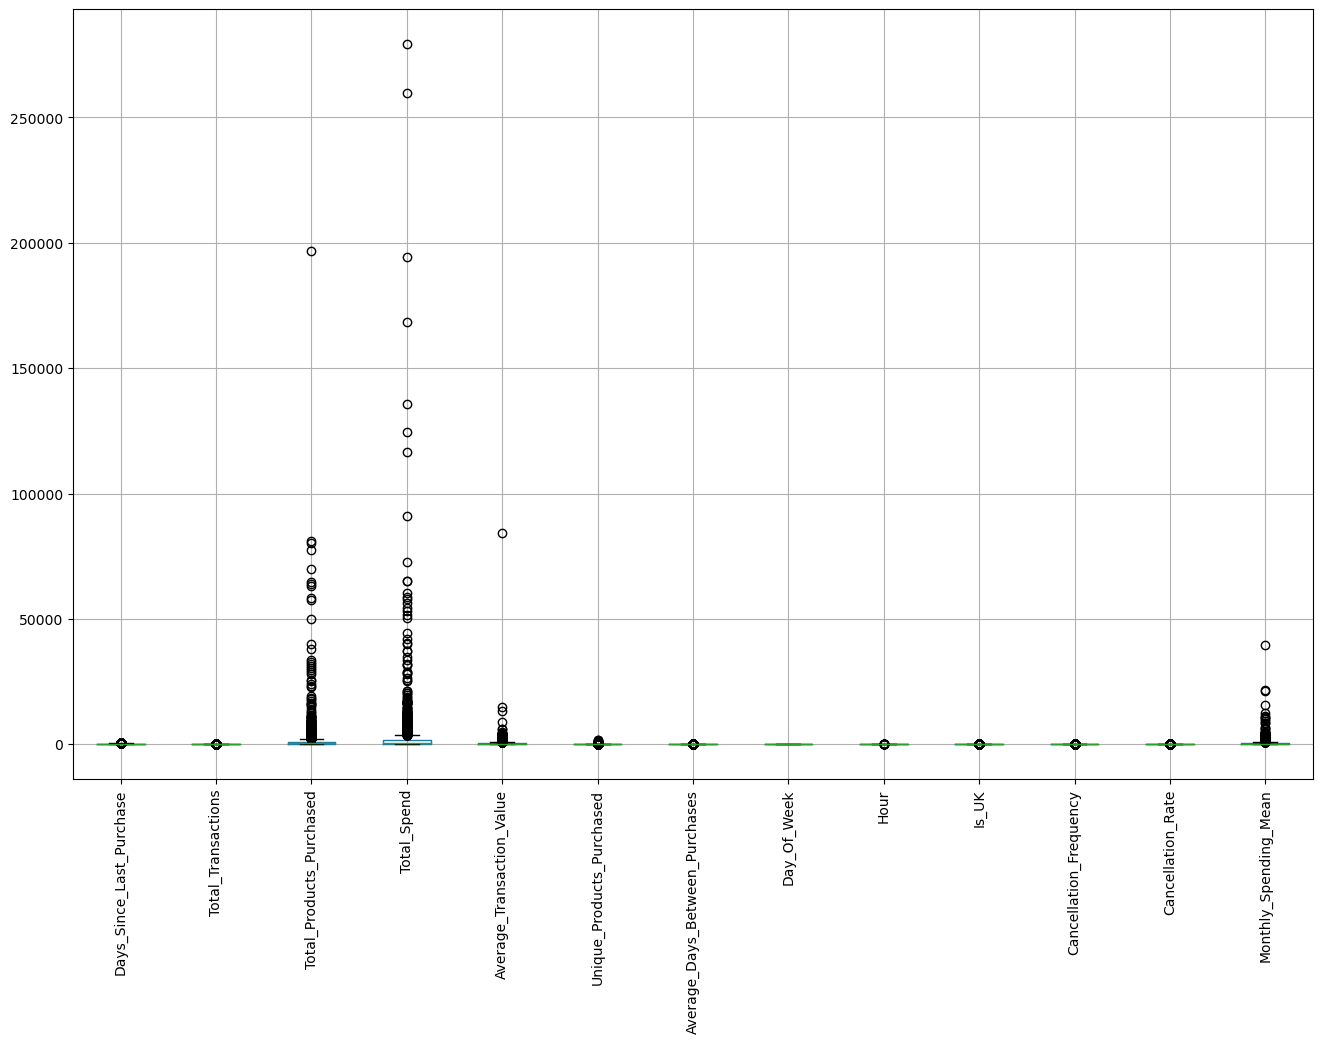

In [40]:
customer_data.boxplot(figsize=(16, 10))
plt.xticks(rotation=90)
plt.show()

In [43]:
# Isolation Forest is an unsupervised machine learning algorithm for anomaly detection.
# The "contamination parameter" refers to the proportion of anomalies expected in the dataset.

# Initializing the IsolationForest model with a contamination parameter of 0.05
model = IsolationForest(contamination=0.05, random_state=0)

# Fitting the model on our dataset (converting DataFrame to NumPy to avoid warning)
customer_data['Outlier_Scores'] = model.fit_predict(customer_data.iloc[:, 1:].to_numpy())

# Creating a new column to identify outliers (1 for inliers and -1 for outliers)
customer_data['Is_Outlier'] = [1 if x == -1 else 0 for x in customer_data['Outlier_Scores']]

# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0    12347.0                         2                   7   
1    12348.0                        75                   4   
2    12349.0                        18                   1   
3    12350.0                       310                   1   
4    12352.0                        36                   7   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                      2458       4310.0                 615.714286   
1                      2332      1437.24                     359.31   
2                       630      1457.55                    1457.55   
3                       196        294.4                      294.4   
4                       526      1385.74                 197.962857   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                        103                        2.016575            1   
1                         21                       10.884615            3   
2                         72                             0.0            0   
3                         16                             0.0            2   
4                         57                        3.421053            1   

   Hour  Is_UK  Cancellation_Frequency  Cancellation_Rate  \
0    14      0                       0                0.0   
1    19      0                       0                0.0   
2     9      0                       0                0.0   
3    16      0                       0                0.0   
4    14      0                       1                1.0   

   Monthly_Spending_Mean  Outlier_Scores  Is_Outlier  
0             615.714286               1           0  
1                 359.31               1           0  
2                1457.55               1           0  
3                  294.4               1           0  
4               316.3525               1           0

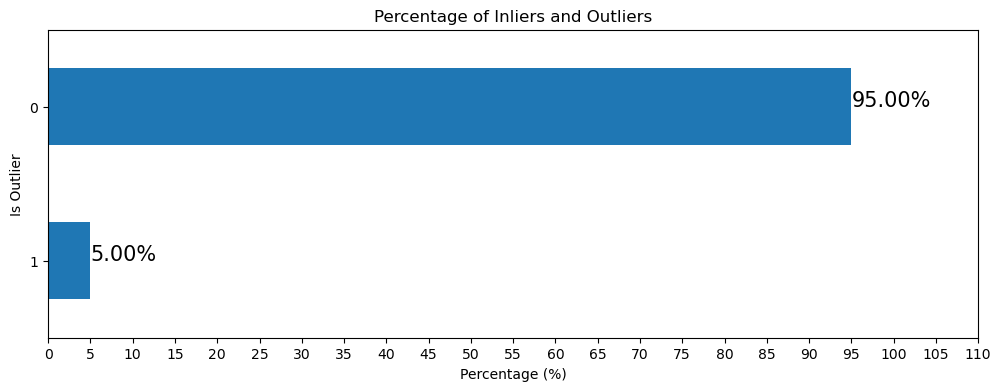

In [44]:
# Calculate the percentage of inliers and outliers
outlier_percentage = customer_data['Is_Outlier'].value_counts(normalize=True) * 100

# Plotting the percentage of inliers and outliers
plt.figure(figsize=(12, 4))
outlier_percentage.plot(kind='barh')

# Adding the percentage labels on the bars
for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()

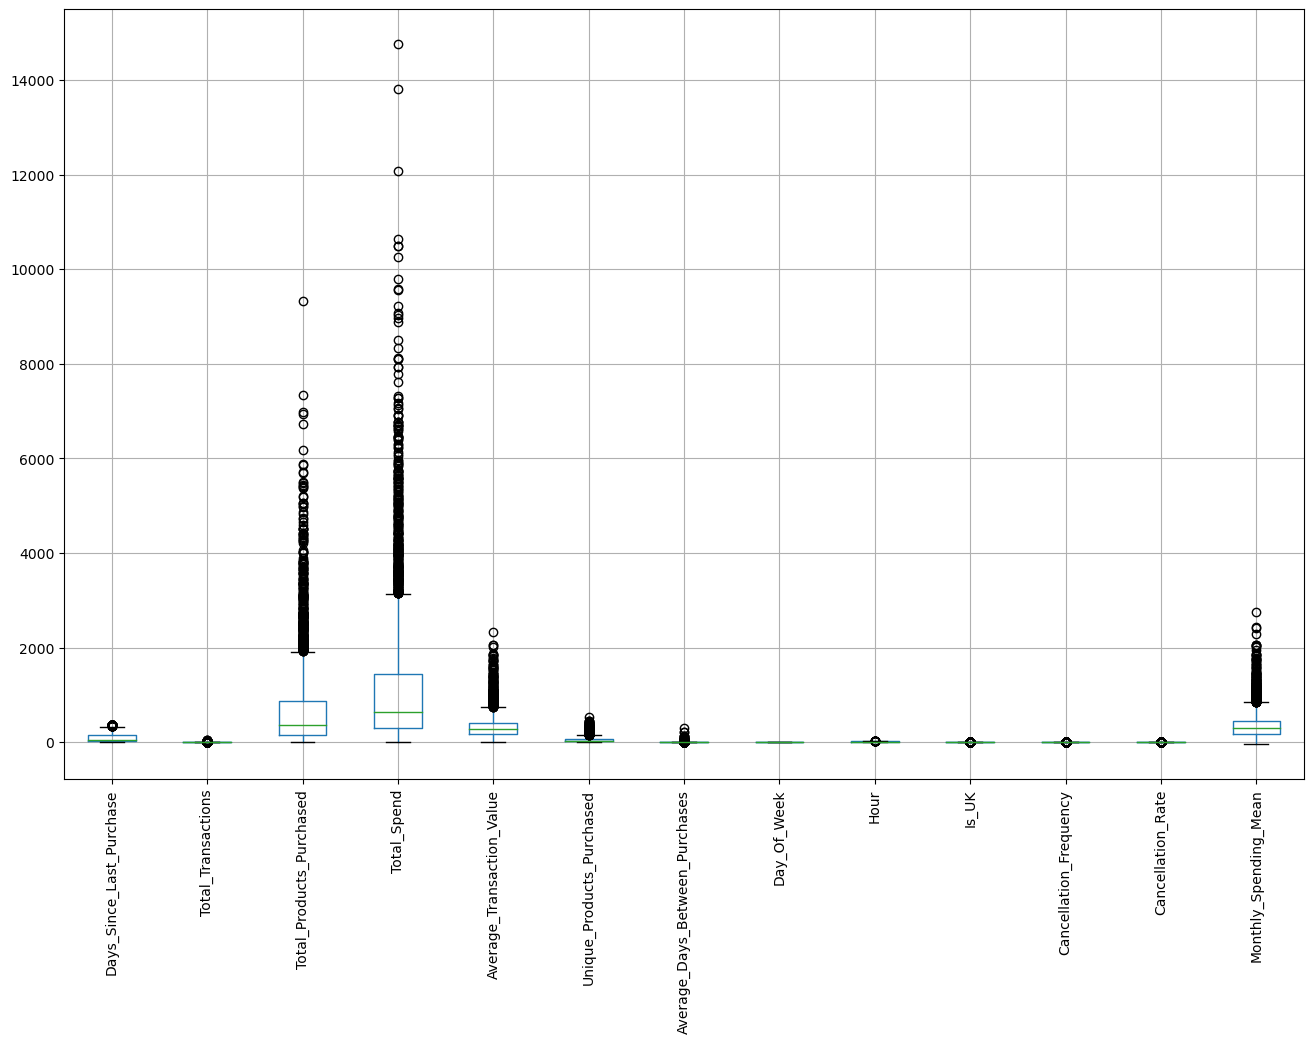

In [45]:
# Separate the outliers for analysis
outliers_data = customer_data[customer_data['Is_Outlier'] == 1]

# Remove the outliers from the main dataset
customer_data_cleaned = customer_data[customer_data['Is_Outlier'] == 0]

# Drop the 'Outlier_Scores' and 'Is_Outlier' columns
customer_data_cleaned = customer_data_cleaned.drop(columns=['Outlier_Scores', 'Is_Outlier'])

# Reset the index of the cleaned data
customer_data_cleaned.reset_index(drop=True, inplace=True)

customer_data_cleaned.boxplot(figsize=(16, 10))
plt.xticks(rotation=90)
plt.show()

In [46]:
# Getting the number of rows in the cleaned customer dataset
customer_data_cleaned.shape[0]

4047

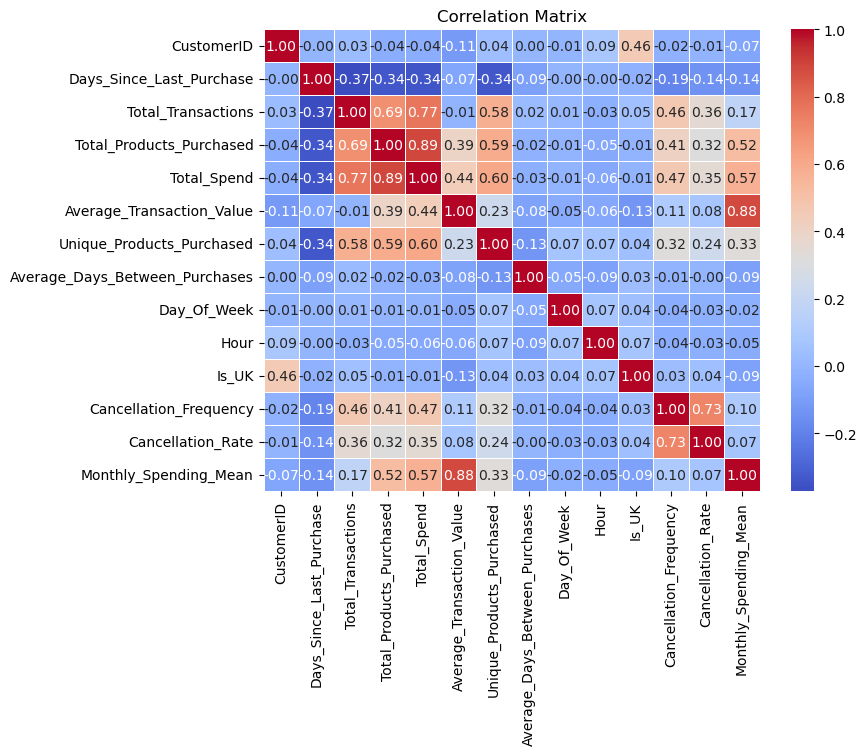

In [54]:
# Calculate the correlation matrix
correlation_matrix = customer_data_cleaned.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [69]:
# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns that don't need to be scaled
columns_to_exclude = ['CustomerID', 'Is_UK', 'Day_Of_Week']

# List of columns that need to be scaled
columns_to_scale = customer_data_cleaned.columns.difference(columns_to_exclude)

# Copy the cleaned dataset
customer_data_scaled = customer_data_cleaned.copy()

# Applying the scaler to the necessary columns in the dataset
customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])

# Display the first few rows of the scaled data
customer_data_scaled.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0    12347.0                 -0.917159            0.977941   
1    12348.0                 -0.180692            0.151118   
2    12349.0                 -0.755742           -0.675705   
3    12350.0                  2.190127           -0.675705   
4    12352.0                 -0.574147            0.977941   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                  2.069183     2.287980                   1.165188   
1                  1.922362     0.214922                   0.110178   
2                 -0.060893     0.229578                   4.629033   
3                 -0.566611    -0.609781                  -0.156903   
4                 -0.182079     0.177758                  -0.553706   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                   0.787596                       -0.115316            1   
1                  -0.571898                        0.763410            3   
2                   0.273641                       -0.315136            0   
3                  -0.654794                       -0.315136            2   
4                   0.024953                        0.023853            1   

       Hour  Is_UK  Cancellation_Frequency  Cancellation_Rate  \
0  0.644440      0               -0.525989          -0.444572   
1  2.810955      0               -0.525989          -0.444572   
2 -1.522074      0               -0.525989          -0.444572   
3  1.511046      0               -0.525989          -0.444572   
4  0.644440      0                0.410517           1.263564   

   Monthly_Spending_Mean  
0               0.941554  
1              -0.003094  
2               4.043053  
3              -0.242236  
4              -0.161358

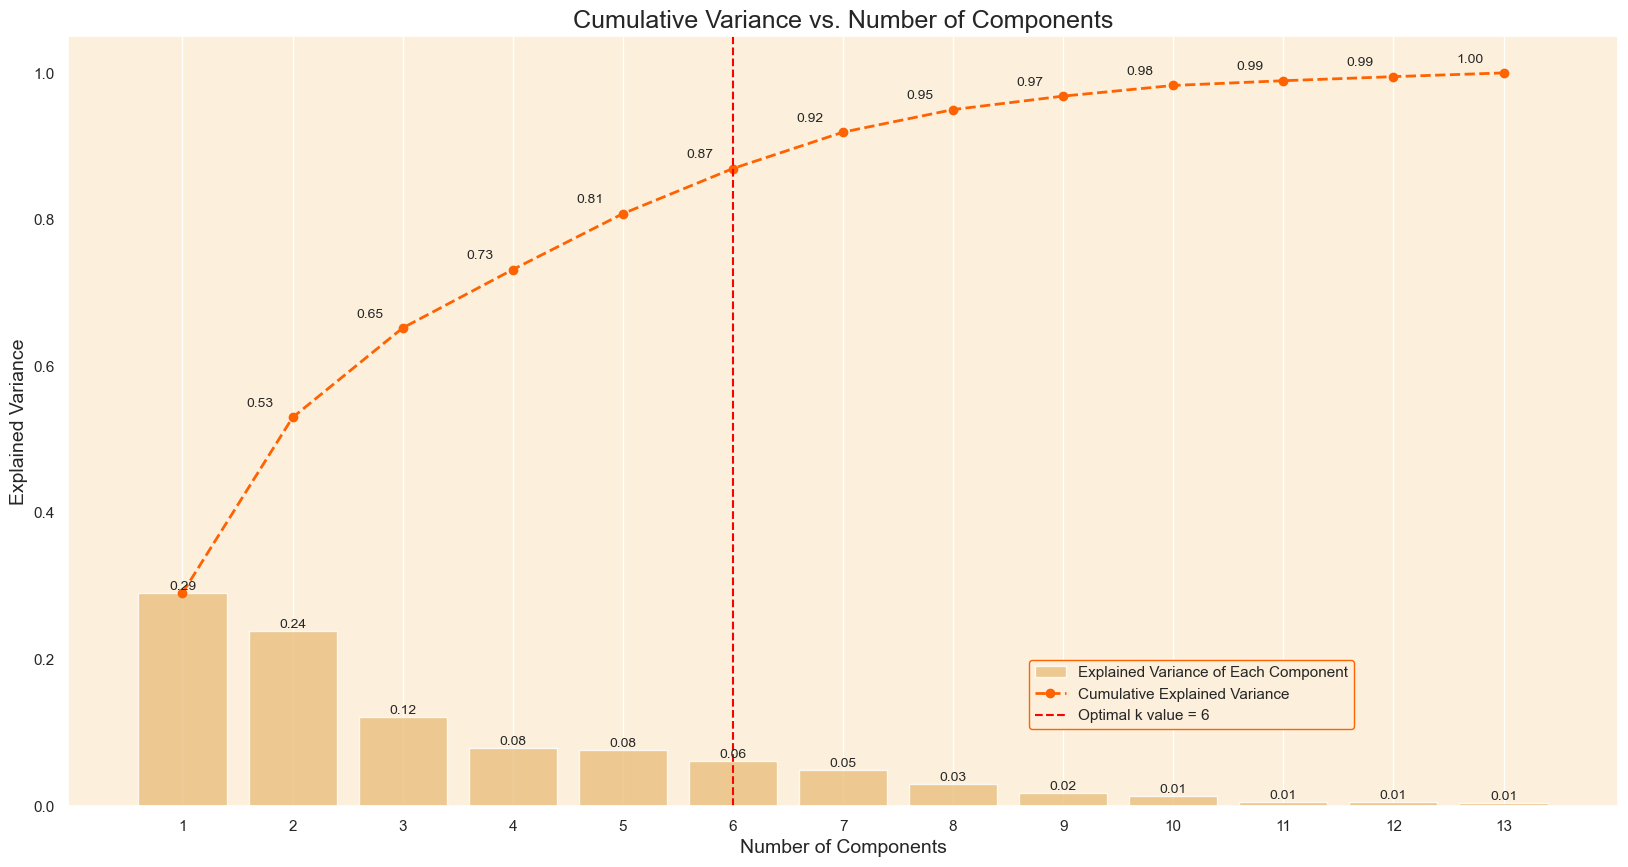

In [70]:
# Setting CustomerID as the index column
customer_data_scaled.set_index('CustomerID', inplace=True)

# Apply PCA
pca = PCA().fit(customer_data_scaled)

# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Set the optimal k value (for now we start with 6)
optimal_k = 6

# Set seaborn plot style
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20, 10))

# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#fcc36d',
                      alpha=0.8)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#ff6200', linewidth=2)

# Plot optimal k value line
optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}')

# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# Customize ticks and legend
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,
           edgecolor='#ff6200')

# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')
plt.show()

In [71]:
# Creating a PCA object with 5 components
pca = PCA(n_components=5)

# Fitting and transforming the original data to the new PCA dataframe
customer_data_pca = pca.fit_transform(customer_data_scaled)

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
customer_data_pca = pd.DataFrame(customer_data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the CustomerID index back to the new PCA dataframe
customer_data_pca.index = customer_data_scaled.index

# Displaying the resulting dataframe based on the PCs
customer_data_pca.head()

PC1       PC2       PC3       PC4       PC5
CustomerID                                                  
12347.0     3.135412 -1.331993  1.265848  1.534942 -0.598003
12348.0     0.466363  0.565755  0.307476  1.249462 -1.249592
12349.0     2.336130 -2.709534  5.351697 -0.850381  1.311769
12350.0    -1.857130 -0.603523  0.607373 -0.799697 -1.334793
12352.0     0.818092 -1.477446 -1.373101 -0.099719 -0.534715

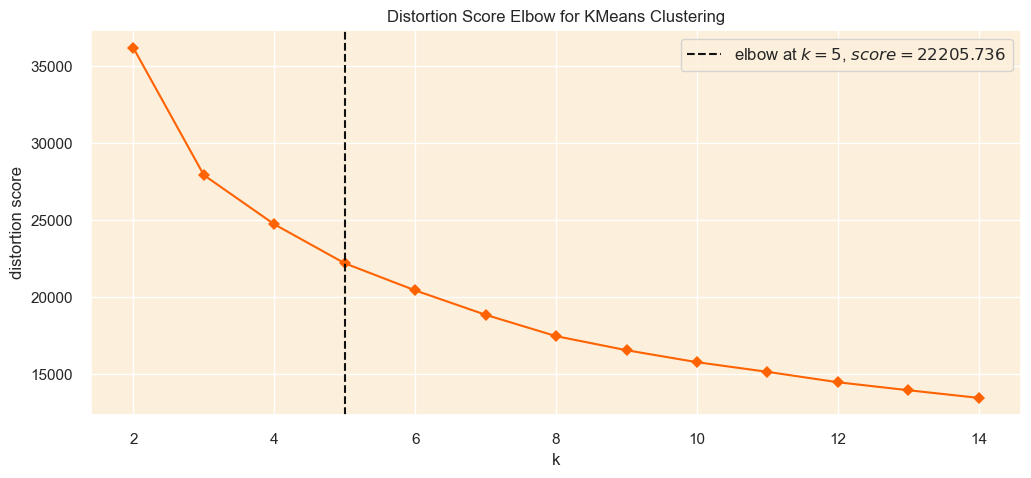

In [80]:
# Set plot style, and background color
sns.set(style='darkgrid', rc={'axes.facecolor': '#fcf0dc'})

# Set the color palette for the plot
sns.set_palette(['#ff6200'])

# Instantiate the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12, 5))

# Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)

# Fit the data to the visualizer
visualizer.fit(customer_data_pca)

# Finalize and render the figure
visualizer.show();

In [81]:
def silhouette_analysis(df, start_k, stop_k, figsize=(15, 16)):

    # Set the size of the figure
    plt.figure(figsize=figsize)

    # Create a grid with (stop_k - start_k + 1) rows and 2 columns
    grid = gridspec.GridSpec(stop_k - start_k + 1, 2)

    # Assign the first plot to the first row and both columns
    first_plot = plt.subplot(grid[0, :])

    # First plot: Silhouette scores for different k values
    sns.set_palette(['darkorange'])

    silhouette_scores = []

    # Iterate through the range of k values
    for k in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
        km.fit(df)
        labels = km.predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)

    best_k = start_k + silhouette_scores.index(max(silhouette_scores))

    plt.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o')
    plt.xticks(range(start_k, stop_k + 1))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Average Silhouette Score for Different k Values', fontsize=15)


    # Add the optimal k value text to the plot
    optimal_k_text = f'The k value with the highest Silhouette score is: {best_k}'
    plt.text(10, 0.23, optimal_k_text, fontsize=12, verticalalignment='bottom',
             horizontalalignment='left', bbox=dict(facecolor='#fcc36d', edgecolor='#ff6200', boxstyle='round, pad=0.5'))


    # Second plot (subplot): Silhouette plots for each k value
    colors = sns.color_palette("bright")

    for i in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
        row_idx, col_idx = divmod(i - start_k, 2)

        # Assign the plots to the second, third, and fourth rows
        ax = plt.subplot(grid[row_idx + 1, col_idx])

        visualizer = SilhouetteVisualizer(km, colors=colors, ax=ax)
        visualizer.fit(df)

        # Add the Silhouette score text to the plot
        score = silhouette_score(df, km.labels_)
        ax.text(0.97, 0.02, f'Silhouette Score: {score:.2f}', fontsize=12, \
                ha='right', transform=ax.transAxes, color='red')

        ax.set_title(f'Silhouette Plot for {i} Clusters', fontsize=15)

    plt.tight_layout()
    plt.show()

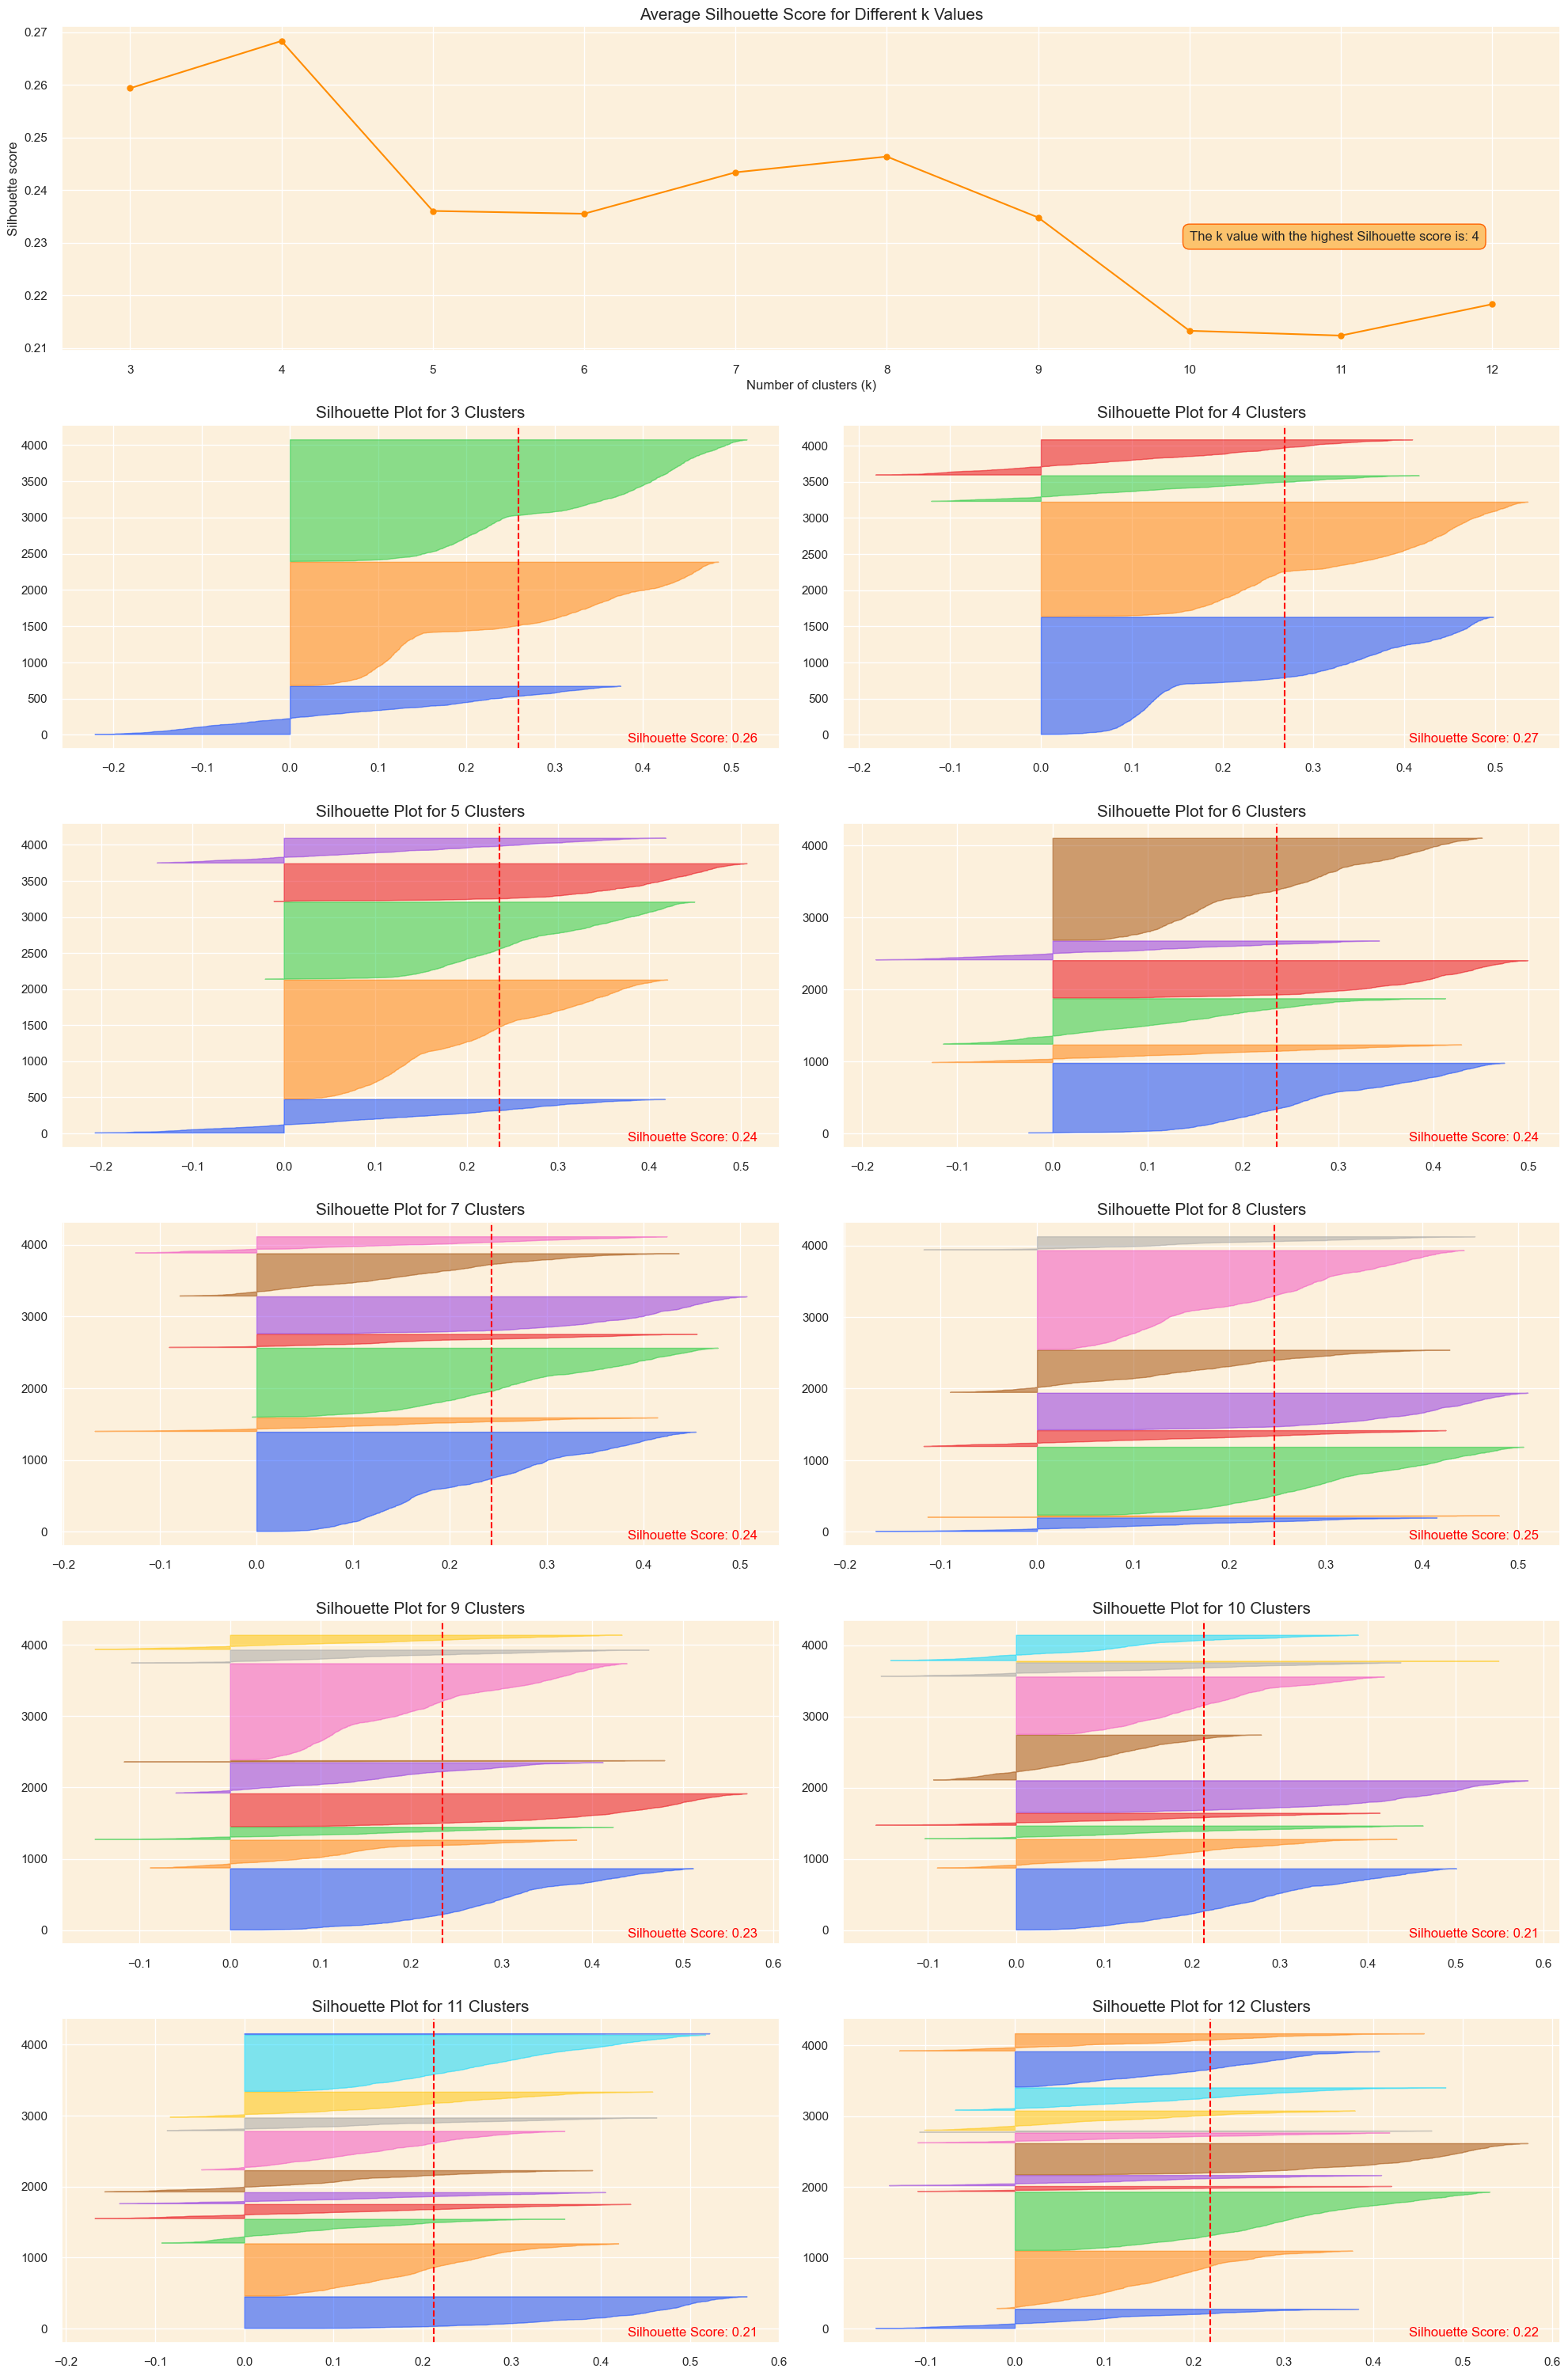

In [86]:
silhouette_analysis(customer_data_pca, 3, 12, figsize=(20, 50))

In [87]:
# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(customer_data_pca)
customer_data_cleaned['cluster'] = kmeans.labels_
customer_data_pca['cluster'] = kmeans.labels_

# Display the first few rows of the original dataframe
customer_data_cleaned.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0    12347.0                         2                   7   
1    12348.0                        75                   4   
2    12349.0                        18                   1   
3    12350.0                       310                   1   
4    12352.0                        36                   7   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                      2458       4310.0                 615.714286   
1                      2332      1437.24                     359.31   
2                       630      1457.55                    1457.55   
3                       196        294.4                      294.4   
4                       526      1385.74                 197.962857   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                        103                        2.016575            1   
1                         21                       10.884615            3   
2                         72                             0.0            0   
3                         16                             0.0            2   
4                         57                        3.421053            1   

   Hour  Is_UK  Cancellation_Frequency  Cancellation_Rate  \
0    14      0                       0                0.0   
1    19      0                       0                0.0   
2     9      0                       0                0.0   
3    16      0                       0                0.0   
4    14      0                       1                1.0   

   Monthly_Spending_Mean  cluster  
0             615.714286        0  
1                 359.31        1  
2                1457.55        2  
3                  294.4        2  
4               316.3525        2

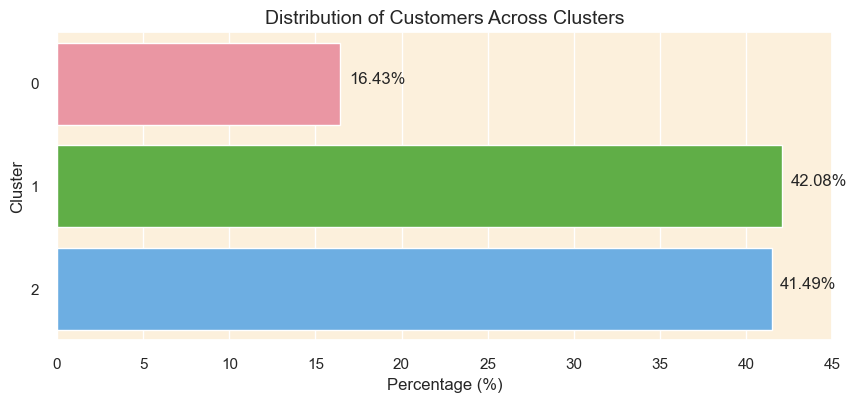

In [89]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (customer_data_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h')

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

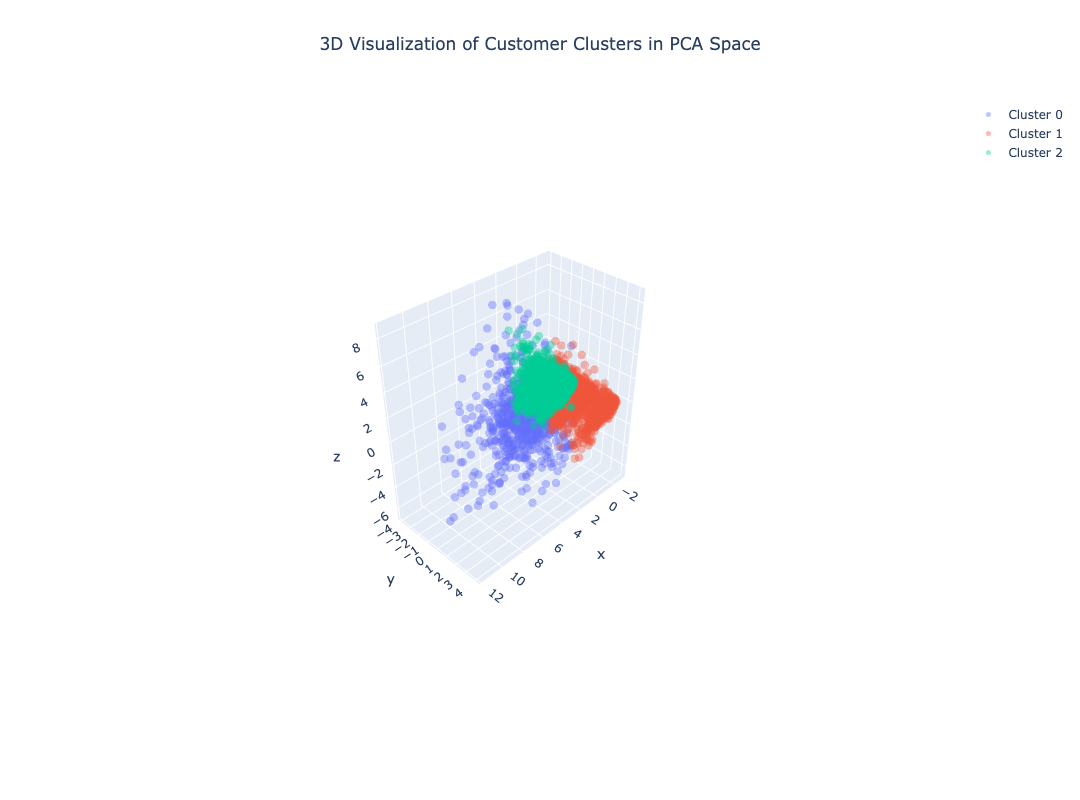

In [93]:
# Create separate data frames for each cluster
cluster_0 = customer_data_pca[customer_data_pca['cluster'] == 0]
cluster_1 = customer_data_pca[customer_data_pca['cluster'] == 1]
cluster_2 = customer_data_pca[customer_data_pca['cluster'] == 2]

# Create a 3D scatter plot
fig = go.Figure()

# Add data points for each cluster separately and specify the color
fig.add_trace(go.Scatter3d(x=cluster_0['PC1'], y=cluster_0['PC2'], z=cluster_0['PC3'],
                           mode='markers', marker=dict(size=5, opacity=0.4), name='Cluster 0'))
fig.add_trace(go.Scatter3d(x=cluster_1['PC1'], y=cluster_1['PC2'], z=cluster_1['PC3'],
                           mode='markers', marker=dict(size=5, opacity=0.4), name='Cluster 1'))
fig.add_trace(go.Scatter3d(x=cluster_2['PC1'], y=cluster_2['PC2'], z=cluster_2['PC3'],
                           mode='markers', marker=dict(size=5, opacity=0.4), name='Cluster 2'))

# Set the title and layout details
fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    width=900,
    height=800
)

# Show the plot
fig.show()